In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [403]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [404]:
data=pd.read_excel('input_data_quiz.xlsx')

In [405]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NPD_WELL_BORE_CODE,2498.0,5599.000000,0.000000,5599.000,5599.00000,5599.00000,5599.000000,5599.000
ON_STREAM_HRS,2499.0,21.204106,6.970983,0.000,24.00000,24.00000,24.000000,25.000
AVG_DOWNHOLE_PRESSURE,2498.0,98.946740,125.947923,0.000,0.00000,0.00000,250.771250,317.701
AVG_DOWNHOLE_TEMPERATURE,2492.0,40.659215,51.722656,0.000,0.00000,0.00000,106.397250,107.508
AVG_DP_TUBING,2493.0,97.328776,74.578452,0.058,33.61400,48.99200,175.979000,314.409
AVG_ANNULUS_PRESS,2492.0,16.690249,6.578753,0.000,13.18200,16.47450,20.661500,30.020
AVG_CHOKE_SIZE_P,2495.0,66.177557,29.862094,0.000,48.25994,65.97474,99.169365,100.000
AVG_WHP_P,2495.0,52.143907,24.416289,0.000,33.56050,45.96300,64.519500,137.311
AVG_WHT_P,2496.0,80.020514,19.990477,0.035,79.33225,88.06750,90.552000,92.459
DP_CHOKE_SIZE,2496.0,22.623661,23.531784,0.058,4.86825,14.41500,32.230250,124.123


In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NPD_WELL_BORE_CODE        2498 non-null   float64
 1   NPD_WELL_BORE_NAME        2500 non-null   object 
 2   ON_STREAM_HRS             2499 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE     2498 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  2492 non-null   float64
 5   AVG_DP_TUBING             2493 non-null   float64
 6   AVG_ANNULUS_PRESS         2492 non-null   float64
 7   AVG_CHOKE_SIZE_P          2495 non-null   float64
 8   AVG_WHP_P                 2495 non-null   float64
 9   AVG_WHT_P                 2496 non-null   float64
 10  DP_CHOKE_SIZE             2496 non-null   float64
 11  BORE_OIL_VOL              2490 non-null   float64
 12  BORE_GAS_VOL              2495 non-null   float64
 13  BORE_WAT_VOL              2495 non-null   float64
dtypes: float

## Data Exploration

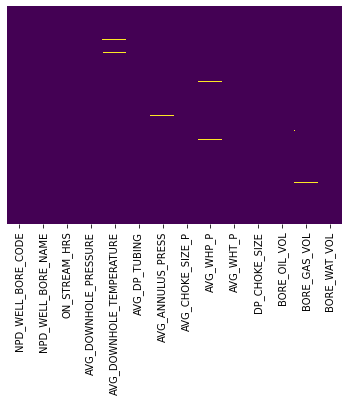

In [407]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()
#data.isnull().sum()

In [408]:
data['BORE_OIL_VOL'].replace(np.NaN,method='ffill',inplace=True)

In [409]:

data.fillna(method='ffill',inplace=True)

In [410]:
print(data.isnull().sum())

NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

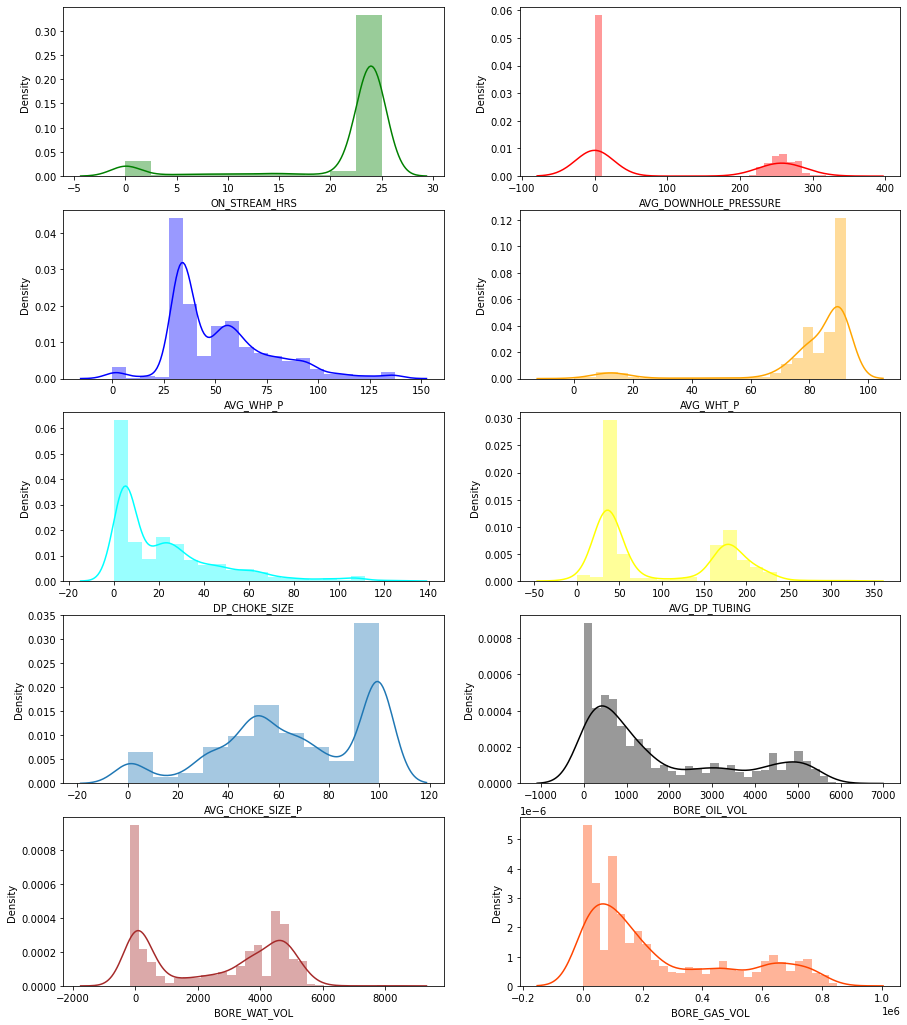

In [411]:
f, axes = plt.subplots(5, 2,figsize=[15,18])
sns.distplot(data['ON_STREAM_HRS'],bins=10,color='green',kde=bool,ax=axes[0,0])
sns.distplot(data['AVG_DOWNHOLE_PRESSURE'],bins=30,color='red',kde=bool,ax=axes[0,1])
sns.distplot(data['AVG_WHP_P'],bins=20,color='blue',kde=bool,ax=axes[1,0])
sns.distplot(data['AVG_WHT_P'],bins=25,color='orange',kde=bool,ax=axes[1,1])
sns.distplot(data['DP_CHOKE_SIZE'],bins=20,color='cyan',kde=bool,ax=axes[2,0])
sns.distplot(data['AVG_DP_TUBING'],bins=20,color='yellow',kde=bool,ax=axes[2,1])
sns.distplot(data['AVG_CHOKE_SIZE_P'],bins=10,kde=bool,ax=axes[3,0])
sns.distplot(data['BORE_OIL_VOL'],bins=30,kde=bool,ax=axes[3,1],color='black')
sns.distplot(data['BORE_WAT_VOL'],bins=30,kde=bool,ax=axes[4,0],color='brown')
sns.distplot(data['BORE_GAS_VOL'],bins=30,kde=bool,ax=axes[4,1],color='orangered')
plt.show()


In [412]:
data.skew()

NPD_WELL_BORE_CODE          0.000000
ON_STREAM_HRS              -2.396482
AVG_DOWNHOLE_PRESSURE       0.503711
AVG_DOWNHOLE_TEMPERATURE    0.479054
AVG_DP_TUBING               0.502854
AVG_ANNULUS_PRESS          -0.468892
AVG_CHOKE_SIZE_P           -0.476211
AVG_WHP_P                   0.997206
AVG_WHT_P                  -2.720619
DP_CHOKE_SIZE               1.618244
BORE_OIL_VOL                0.884815
BORE_GAS_VOL                0.867443
BORE_WAT_VOL               -0.097396
dtype: float64

In [413]:
dset=data['AVG_DOWNHOLE_PRESSURE']

In [414]:
def ecdf(dset):
    x=np.sort(dset)
    y=np.arange(1,len(dset)+1)/len(dset)
    plt.grid()
    plt.ylabel("ECDF",fontsize=14)
    plt.xlabel('distrtibution',fontsize=14)
    plt.plot(x,y,color='green',linestyle='none',marker='+',alpha=0.7)

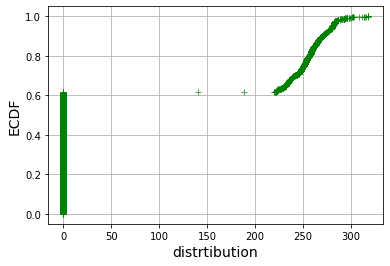

In [415]:
ecdf(dset)

plt.figure(figsize=[7,7])
sns.boxplot(data['AVG_DOWNHOLE_PRESSURE'])
plt.show()

In [416]:
(data==0).sum()

NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                176
AVG_DOWNHOLE_PRESSURE       1539
AVG_DOWNHOLE_TEMPERATURE    1539
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS             39
AVG_CHOKE_SIZE_P              55
AVG_WHP_P                      1
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                 178
BORE_GAS_VOL                 176
BORE_WAT_VOL                 275
dtype: int64

### Data Preprocessing

In [417]:
data['AVG_ANNULUS_PRESS'].replace(0,method='ffill',inplace=True)

In [418]:
data['AVG_CHOKE_SIZE_P'].replace(0,data['AVG_CHOKE_SIZE_P'].median(),inplace=True)

In [419]:
data['AVG_WHP_P'].replace(0,method='ffill',inplace=True)

In [420]:
data['BORE_OIL_VOL'].replace(0,data['BORE_OIL_VOL'].mean(),inplace=True)

In [421]:
data['BORE_WAT_VOL'].replace(0,data['BORE_WAT_VOL'].mean(),inplace=True)

In [422]:
data['BORE_GAS_VOL'].replace(0,data['BORE_GAS_VOL'].mean(),inplace=True)

In [423]:
data['ON_STREAM_HRS'].replace(0,data['ON_STREAM_HRS'].mean(),inplace=True)

In [424]:
#data['ON_STREAM_HRS'].quantile(0.05)

In [425]:
data['AVG_DOWNHOLE_PRESSURE'].replace(0,data['AVG_DOWNHOLE_PRESSURE'].quantile(0.65),inplace=True)

<AxesSubplot:>

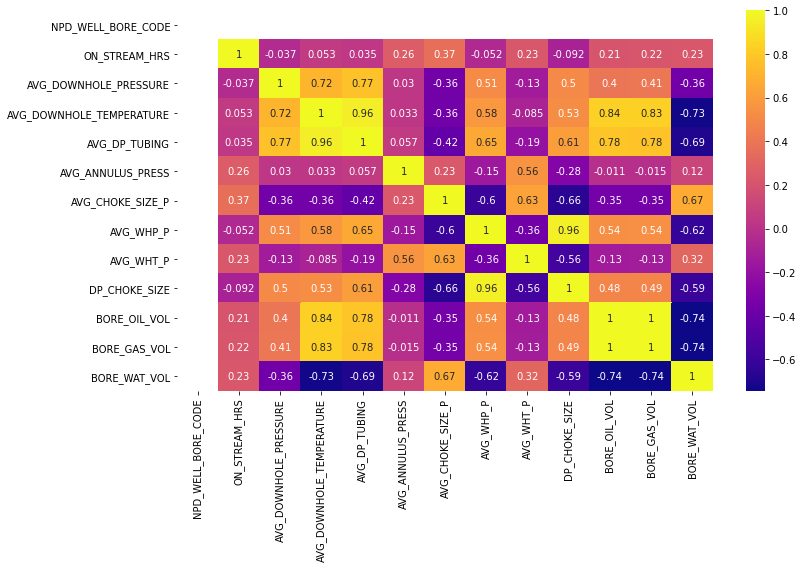

In [426]:
plt.figure(figsize=[12,7])
sns.heatmap(data.corr(),cmap='plasma',annot=True)

## Data scaling

In [427]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [428]:
#data=data.drop(['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_TEMPERATURE','BORE_GAS_VOL'],axis=1)

In [429]:
data[['ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P',
     'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']]=scaler.fit_transform(data[['ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P',
     'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']])


plt.figure(figsize=[12,7])
sns.heatmap(data.corr(),cmap='plasma',linewidth=1,linecolor ='black',annot=True)
plt.show()

In [430]:
target=data['BORE_OIL_VOL']
features=data.drop(['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_TEMPERATURE','BORE_GAS_VOL','BORE_OIL_VOL'],axis=1)

## Training

In [431]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=10)

In [432]:
len(X_train)

2000

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

X_poly = poly_reg.fit_transform(X_train)
x_pol_test = poly_reg.fit_transform(X_test)

#apply liner regression on higher level polynominal
regr=LinearRegression()
regr.fit(X_poly,y_train)
y_pred=regr.predict(x_pol_test)

print("R-squared value of test data",regr.score(x_pol_test,y_test))

In [446]:
regr=LinearRegression()
regr.fit(X_train,y_train)
y_predict=regr.predict(X_test)

In [447]:
regr.score(X_test,y_test)

0.8221546387673423

In [448]:
test_data=pd.read_excel('test_data_quiz.xlsx')

In [450]:
#feature scaling
test_data[['ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P',
     'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']]=scaler.fit_transform(test_data[['ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P',
     'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']])

In [451]:
test_final=test_data.drop(['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_TEMPERATURE','BORE_GAS_VOL'],axis=1)

In [458]:
test_final.dropna(inplace=True)

In [462]:
df=pd.DataFrame(regr.predict(test_final))

In [463]:
df.to_csv(r'C:\Users\Admin\Desktop\file3.csv', index=False)